In [1]:
from __future__ import absolute_import,division,print_function,unicode_literals
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot  as plt
import numpy as np
import os
from datetime import datetime
import pandas as pd
# from download import download
mpl.rcParams['figure.figsize'] = (8,6)
mpl.rcParams['axes.grid'] = False

In [2]:
data = pd.read_csv('cleaned_data.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 20 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   From Date  1599 non-null   object 
 1   To Date    1599 non-null   object 
 2   PM2.5      1579 non-null   float64
 3   PM10       1583 non-null   float64
 4   NO         1582 non-null   float64
 5   NO2        1582 non-null   float64
 6   Nox        1582 non-null   float64
 7   NH3        1567 non-null   float64
 8   SO2        1566 non-null   float64
 9   CO         1580 non-null   float64
 10  Ozone      1538 non-null   float64
 11  Benzene    1484 non-null   float64
 12  Toluene    1484 non-null   float64
 13  RH         1583 non-null   float64
 14  WD         1583 non-null   float64
 15  SR         1583 non-null   float64
 16  BP         1582 non-null   float64
 17  AT         1582 non-null   float64
 18  Xylene     1482 non-null   float64
 19  TOT-RF     1599 non-null   float64
dtypes: float

In [3]:
# Convert the date column to datetime
data['From Date'] = data['From Date'].apply(lambda x: datetime.strptime(x, '%Y-%m-%d'))
data['To Date'] = data['To Date'].apply(lambda x: datetime.strptime(x, '%Y-%m-%d %H:%M:%S'))
data['From Date'].min(), data['From Date'].max()

(Timestamp('2018-11-11 00:00:00'), Timestamp('2023-03-28 00:00:00'))

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 20 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   From Date  1599 non-null   datetime64[ns]
 1   To Date    1599 non-null   datetime64[ns]
 2   PM2.5      1579 non-null   float64       
 3   PM10       1583 non-null   float64       
 4   NO         1582 non-null   float64       
 5   NO2        1582 non-null   float64       
 6   Nox        1582 non-null   float64       
 7   NH3        1567 non-null   float64       
 8   SO2        1566 non-null   float64       
 9   CO         1580 non-null   float64       
 10  Ozone      1538 non-null   float64       
 11  Benzene    1484 non-null   float64       
 12  Toluene    1484 non-null   float64       
 13  RH         1583 non-null   float64       
 14  WD         1583 non-null   float64       
 15  SR         1583 non-null   float64       
 16  BP         1582 non-null   float64       


In [5]:
data.head()

,From Date,To Date,PM2.5,PM10,NO,NO2,Nox,NH3,SO2,CO,Ozone,Benzene,Toluene,RH,WD,SR,BP,AT,Xylene,TOT-RF
0,2018-11-11,2018-11-12,251.16,439.83,1.75,83.25,45.69,39.29,23.07,1.57,39.13,6.70,17.96,76.73,240.05,29.55,992.08,19.86,0.31,0.0
1,2018-11-12,2018-11-13,235.81,340.70,4.97,80.06,46.58,35.29,13.32,1.54,44.63,6.57,13.94,77.34,244.45,107.99,990.39,19.82,0.31,0.0
2,2018-11-13,2018-11-14,285.09,428.91,16.67,111.32,72.80,41.51,21.87,1.34,31.22,8.68,43.54,78.66,219.97,77.29,988.21,20.48,0.91,0.0
3,2018-11-14,2018-11-15,144.36,205.45,6.34,96.49,56.09,35.79,12.56,1.00,41.93,5.64,28.66,77.86,214.38,105.27,989.02,21.22,0.54,1.0
4,2018-11-15,2018-11-16,109.24,154.94,6.91,77.06,46.79,30.92,12.69,0.65,28.81,4.17,33.59,79.27,185.82,112.20,992.52,19.82,0.57,0.0


In [6]:
aq_df = data.set_index('From Date')
aq_df.drop(['To Date'], axis=1, inplace=True)
aq_df.head()

,PM2.5,PM10,NO,NO2,Nox,NH3,SO2,CO,Ozone,Benzene,Toluene,RH,WD,SR,BP,AT,Xylene,TOT-RF
From Date,,,,,,,,,,,,,,,,,,
2018-11-11,251.16,439.83,1.75,83.25,45.69,39.29,23.07,1.57,39.13,6.70,17.96,76.73,240.05,29.55,992.08,19.86,0.31,0.0
2018-11-12,235.81,340.70,4.97,80.06,46.58,35.29,13.32,1.54,44.63,6.57,13.94,77.34,244.45,107.99,990.39,19.82,0.31,0.0
2018-11-13,285.09,428.91,16.67,111.32,72.80,41.51,21.87,1.34,31.22,8.68,43.54,78.66,219.97,77.29,988.21,20.48,0.91,0.0
2018-11-14,144.36,205.45,6.34,96.49,56.09,35.79,12.56,1.00,41.93,5.64,28.66,77.86,214.38,105.27,989.02,21.22,0.54,1.0
2018-11-15,109.24,154.94,6.91,77.06,46.79,30.92,12.69,0.65,28.81,4.17,33.59,79.27,185.82,112.20,992.52,19.82,0.57,0.0


In [7]:
aq_df.isna().sum()

PM2.5       20
PM10        16
NO          17
NO2         17
Nox         17
NH3         32
SO2         33
CO          19
Ozone       61
Benzene    115
Toluene    115
RH          16
WD          16
SR          16
BP          17
AT          17
Xylene     117
TOT-RF       0
dtype: int64

# Handling Missing Values in Time Series Data

time series is data points order in time

time series data is often missing values due to shutting off of the sensor or other reasons

we can use interpolation to fill in the missing values
what is interpolation?
interpolation is a method of constructing new data points within the range of a discrete set of known data points

we cannot drop the missing values because we will lose the information 

we cannot use glodal mean or median to fill in the missing values because it will change the trend of the data. we can mess up the data. Example: if we have a time series data of temperature and we use the global mean to fill in the missing values, we will get a flat line. this create aa distribution mismatch

We now see what we can do ?



In [8]:
print(aq_df.shape)
print(aq_df.isna().sum())

(1599, 18)
PM2.5       20
PM10        16
NO          17
NO2         17
Nox         17
NH3         32
SO2         33
CO          19
Ozone       61
Benzene    115
Toluene    115
RH          16
WD          16
SR          16
BP          17
AT          17
Xylene     117
TOT-RF       0
dtype: int64


In [9]:
aq_df.query('AT != AT')

,PM2.5,PM10,NO,NO2,Nox,NH3,SO2,CO,Ozone,Benzene,Toluene,RH,WD,SR,BP,AT,Xylene,TOT-RF
From Date,,,,,,,,,,,,,,,,,,
2019-04-28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
2019-04-29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
2019-04-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
2019-05-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
2019-05-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
2019-05-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
2019-05-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
2019-05-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
2019-05-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0


In [10]:
aq_df[aq_df['Ozone'].isnull()]

,PM2.5,PM10,NO,NO2,Nox,NH3,SO2,CO,Ozone,Benzene,Toluene,RH,WD,SR,BP,AT,Xylene,TOT-RF
From Date,,,,,,,,,,,,,,,,,,
2019-04-28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
2019-04-29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
2019-04-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
2019-05-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
2019-05-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-02-19,81.14,167.34,5.21,29.39,19.88,4.08,8.68,0.71,NaN,0.73,8.29,60.35,243.71,162.04,991.12,17.61,0.42,0.0
2022-02-20,81.23,153.47,1.17,18.74,10.91,4.74,9.34,0.67,NaN,0.66,11.24,55.80,243.56,185.01,985.88,18.70,0.08,0.0
2022-03-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0


In [11]:
import plotly.express as px
fig = px.line(data,x='From Date',y='Ozone',title='Ozone with Slider')

fig.update_xaxes( 
    rangeslider_visible=True,
    rangeselector=dict(
        buttons=list([
            dict(count=1,label="1y",step="month",stepmode="backward"),
            dict(count=2,label="2y",step="month",stepmode="backward"),
            dict(count=3,label="3y",step="year",stepmode="backward"), # YTD = year to date it means from 1st jan to current date
            dict(count=1,label="ytd",step="year",stepmode="todate"),
            dict(step="all")
        ])
    )
)
fig.show()


In [12]:
aq_df_na = aq_df.copy()
aq_df_na.dropna(inplace=True)

<AxesSubplot: xlabel='Lag', ylabel='Autocorrelation'>

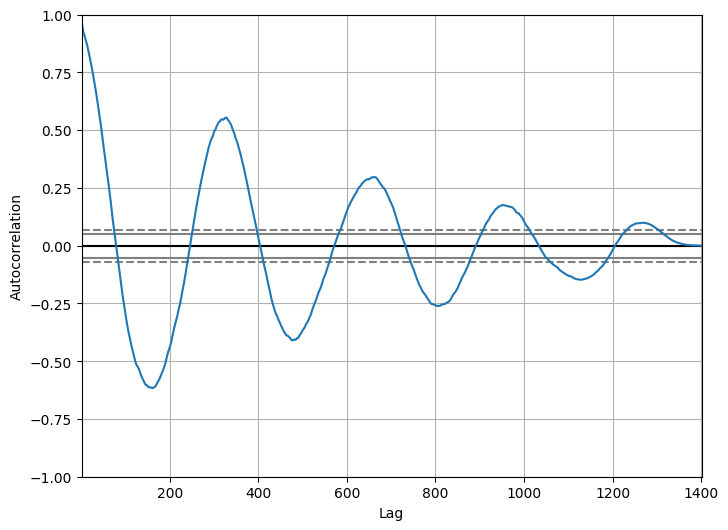

In [13]:
# autocorrealtion plot
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(aq_df_na['2018' : '2023']['AT'])

# Moving Averages

In [14]:
aq_df.head()

,PM2.5,PM10,NO,NO2,Nox,NH3,SO2,CO,Ozone,Benzene,Toluene,RH,WD,SR,BP,AT,Xylene,TOT-RF
From Date,,,,,,,,,,,,,,,,,,
2018-11-11,251.16,439.83,1.75,83.25,45.69,39.29,23.07,1.57,39.13,6.70,17.96,76.73,240.05,29.55,992.08,19.86,0.31,0.0
2018-11-12,235.81,340.70,4.97,80.06,46.58,35.29,13.32,1.54,44.63,6.57,13.94,77.34,244.45,107.99,990.39,19.82,0.31,0.0
2018-11-13,285.09,428.91,16.67,111.32,72.80,41.51,21.87,1.34,31.22,8.68,43.54,78.66,219.97,77.29,988.21,20.48,0.91,0.0
2018-11-14,144.36,205.45,6.34,96.49,56.09,35.79,12.56,1.00,41.93,5.64,28.66,77.86,214.38,105.27,989.02,21.22,0.54,1.0
2018-11-15,109.24,154.94,6.91,77.06,46.79,30.92,12.69,0.65,28.81,4.17,33.59,79.27,185.82,112.20,992.52,19.82,0.57,0.0


# Auto ARIMA